# ChatGpt_資安應用實務_日誌_log分析
## 實作讀取日誌log檔,分析找出入侵者或潛在的資安風險


## 透過日誌分析可以有效地偵測入侵者或潛在的安全風險。日誌檔案通常包含系統、應用程式、網路設備的運行信息，透過分析這些日誌，可以識別出異常行為或潛在威脅。以下是一些步驟和方法，用於進行日誌分析以識別安全風險：

## 1.收集日誌log數據
### 從不同來源收集日誌文件，如伺服器、網路設備、應用程式、防火牆、入侵偵測系統(IDS)。
### 常見的日誌類型包括：
#### 系統日誌（如Linux 的syslog、Windows 的事件日誌）
#### 網路設備日誌（如路由器、防火牆）
#### 應用程式日誌
#### Web 伺服器日誌（如Apache、Nginx）
#### 安全工具日誌（如入侵偵測系統、防毒軟體）
## 2.日誌log分析工具
### 使用日誌分析工具可以簡化資料分析的過程：
#### SIEM 系統（安全資訊與事件管理），如Splunk、ELK Stack（Elasticsearch, Logstash, Kibana）、Graylog。
#### IDS/IPS 系統（入侵偵測/防禦系統）監控異常流量。
#### 基於機器學習的分析，用於偵測新的、未知的攻擊模式。
## 3.識別異常模式
### 登入失敗或可疑登入嘗試：分析短時間內大量的登入失敗或來自異常IP 的嘗試。
#### 非正常時間的活動：在系統常規使用時間外的可疑訪問。
#### 異常流量或頻寬使用：突然的高流量或不明IP 的流量峰值。
#### 文件和權限變更：未授權的文件存取或權限更改，可能表示資料外洩的風險。
#### 未預期的進程啟動：不應出現的程式或腳本在系統上執行。
## 4.設定基線和警報
### 透過設定基準行為模式，識別與正常系統運作不一致的異常活動。
#### 設定自動警報，當偵測到潛在的威脅（如DDoS攻擊、異常登入）時通知管理員。
## 5.持續監控
### 日誌分析應是一個持續的過程，確保能夠即時監控新的威脅和攻擊方式。
## 6.分析入侵後跡象
### 檢查日誌中是否有惡意軟體執行、權限提升、未經授權的資料提取或系統異常關機等痕跡。
### 你可以結合特定環境（如伺服器類型、網路結構）和使用場景，採用適合的分析策略。

## 上傳log file, ChatGpt能做如下的分析:
### 登入嘗試（失敗和成功）：檢查是否有大量失敗的登入嘗試，或來自可疑IP位址的登入。
### 非正常時間的活動：發現夜間或非正常工作時間的訪問記錄。
### 高流量活動：分析是否有異常的網路流量或訪問高峰。
### 文件修改或存取記錄：查看是否有異常的文件存取或變更。
### 系統錯誤或崩潰記錄：檢查是否有未預期的系統錯誤或應用程式崩潰。
### 可疑命令執行或進程啟動：尋找可能與入侵或惡意軟體活動相關的命令或進程。

## Windows 系統的事件日誌檔案位置:
### 1. IIS Web Server 事件日誌
### IIS 的日誌檔案記錄了Web 請求和伺服器活動。日誌檔案的儲存位置可以配置，預設位置是：
### C:\inetpub\logs\LogFiles\W3SVC1\

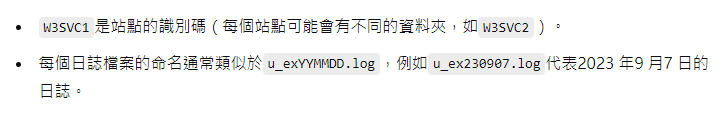

### 2. Windows Server 事件日誌
### Windows 伺服器的事件日誌記錄了系統和應用程式的運作狀態和錯誤訊息。你可以透過「事件檢視器」來查看這些日誌。
### 日誌檔案路徑：這些日誌檔案通常會保存在以下目錄，以.evtx檔案格式儲存：
### C:\Windows\System32\winevt\Logs\
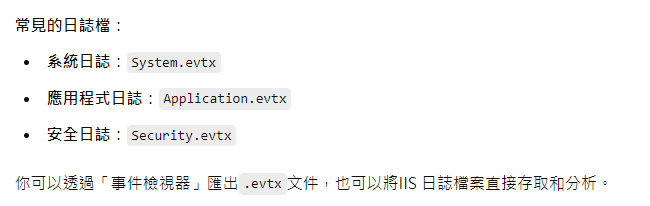

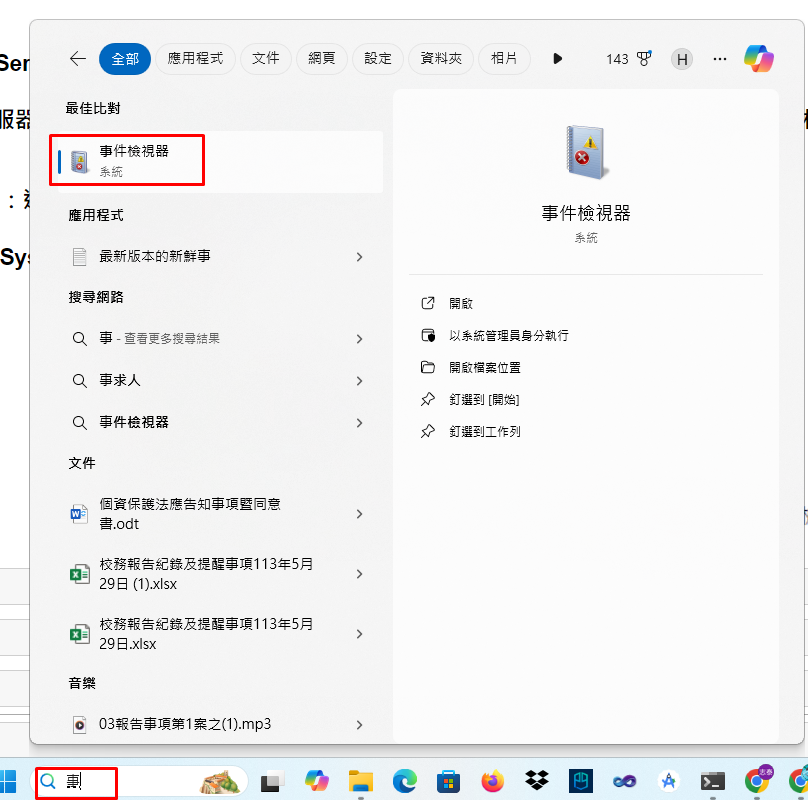

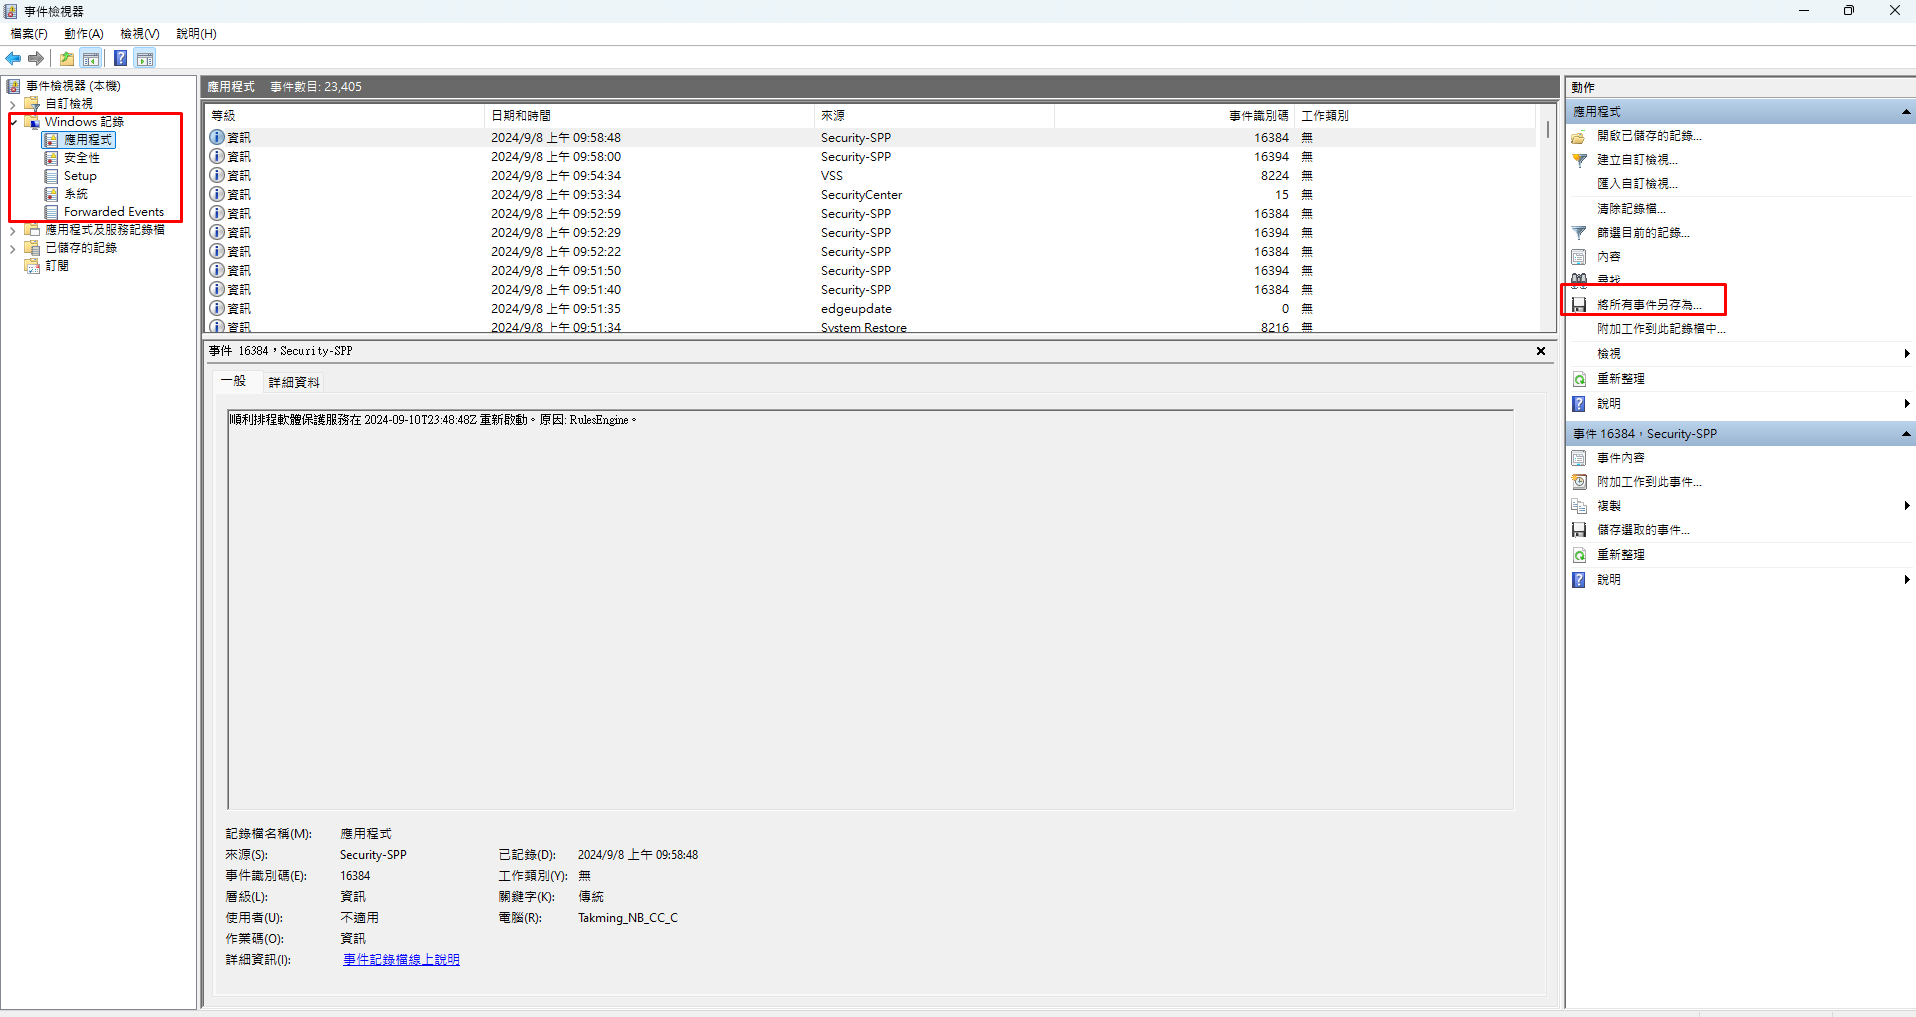

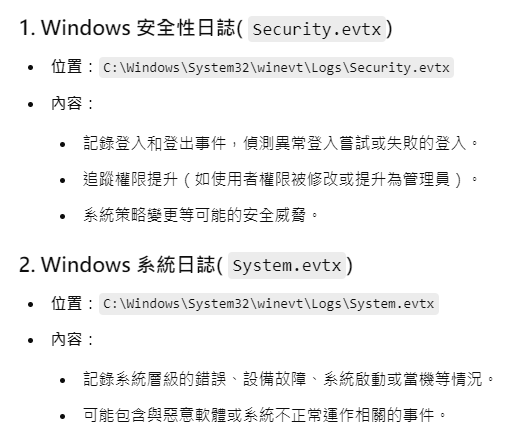

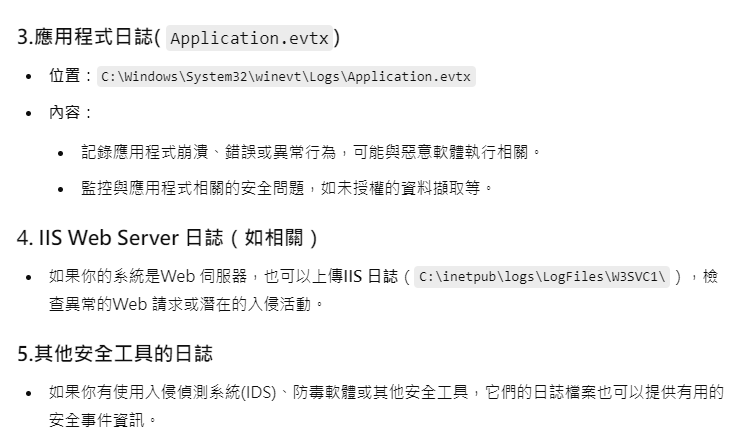

# ChatGpt openai 實作日誌_log分析

## 先將 log file ,比如 .evtx文件先轉換為.csv格式（透過windows事件檢視器匯出），這樣ChatGpt才能進行分析。

## 安裝 pandas
### read .csv file

In [ ]:
!pip install pandas

## 安裝 openai
### https://openai.com/chatgpt
### 要呼叫使用chatgpt api,要安裝 openai,並申請api key(使用chatgpt api 要付費)

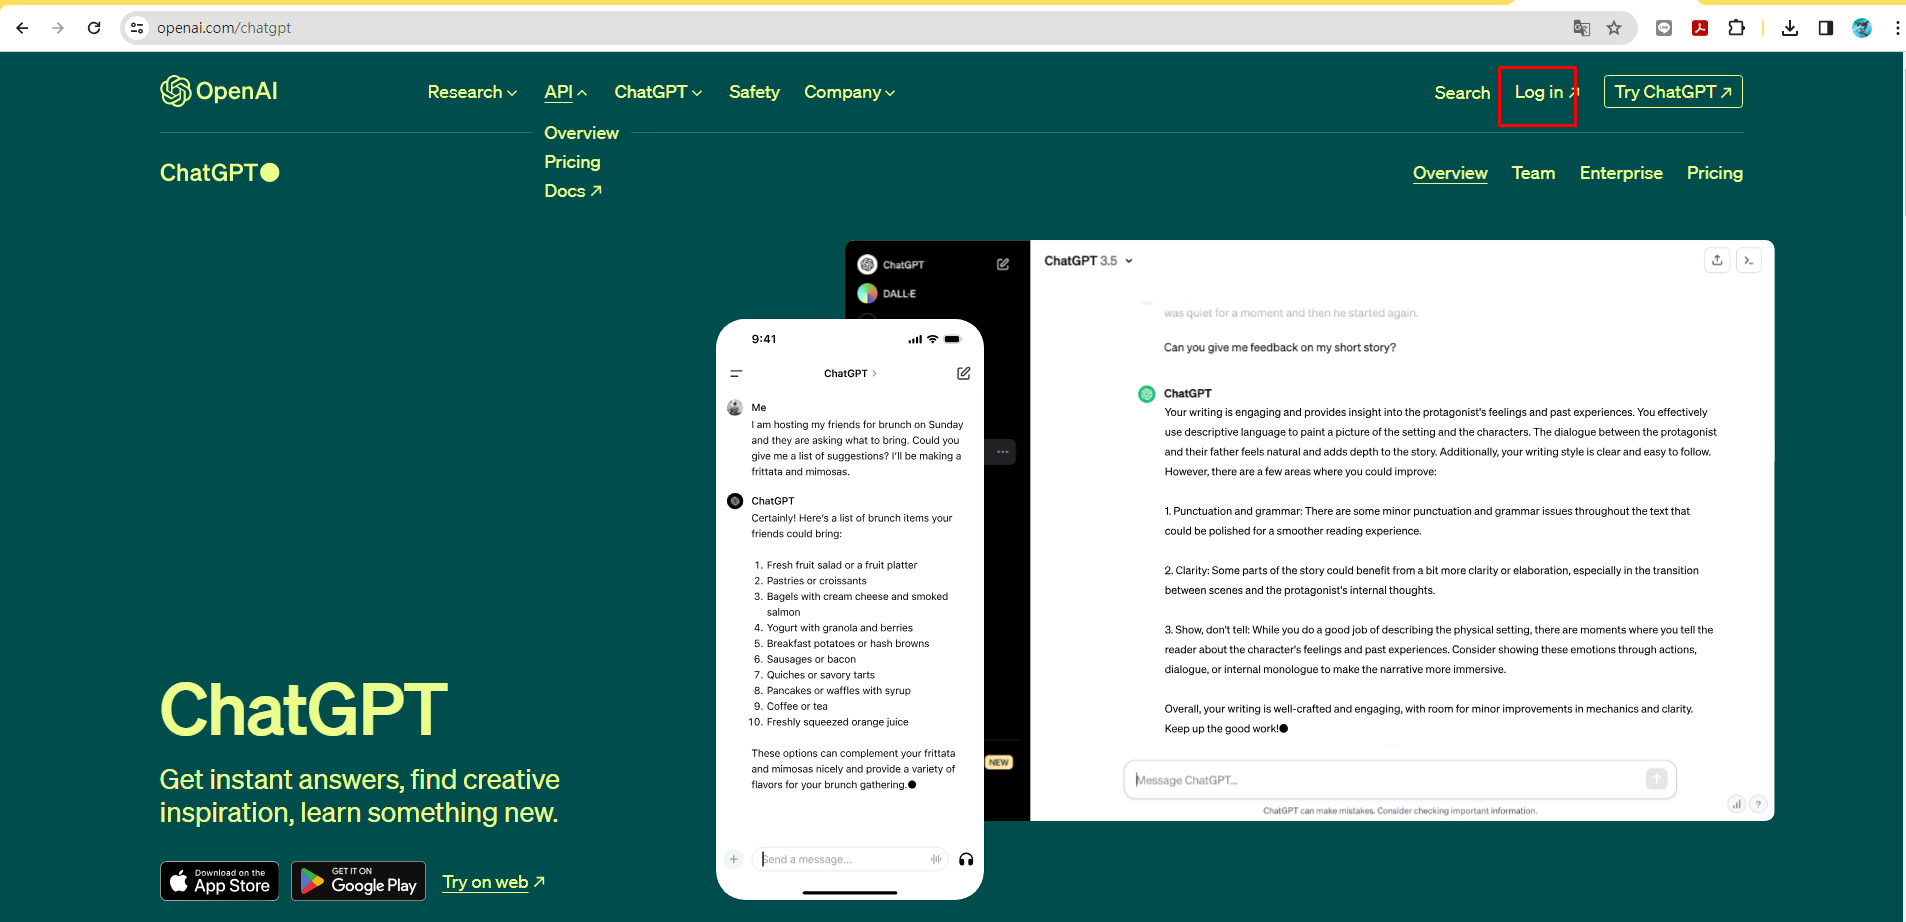

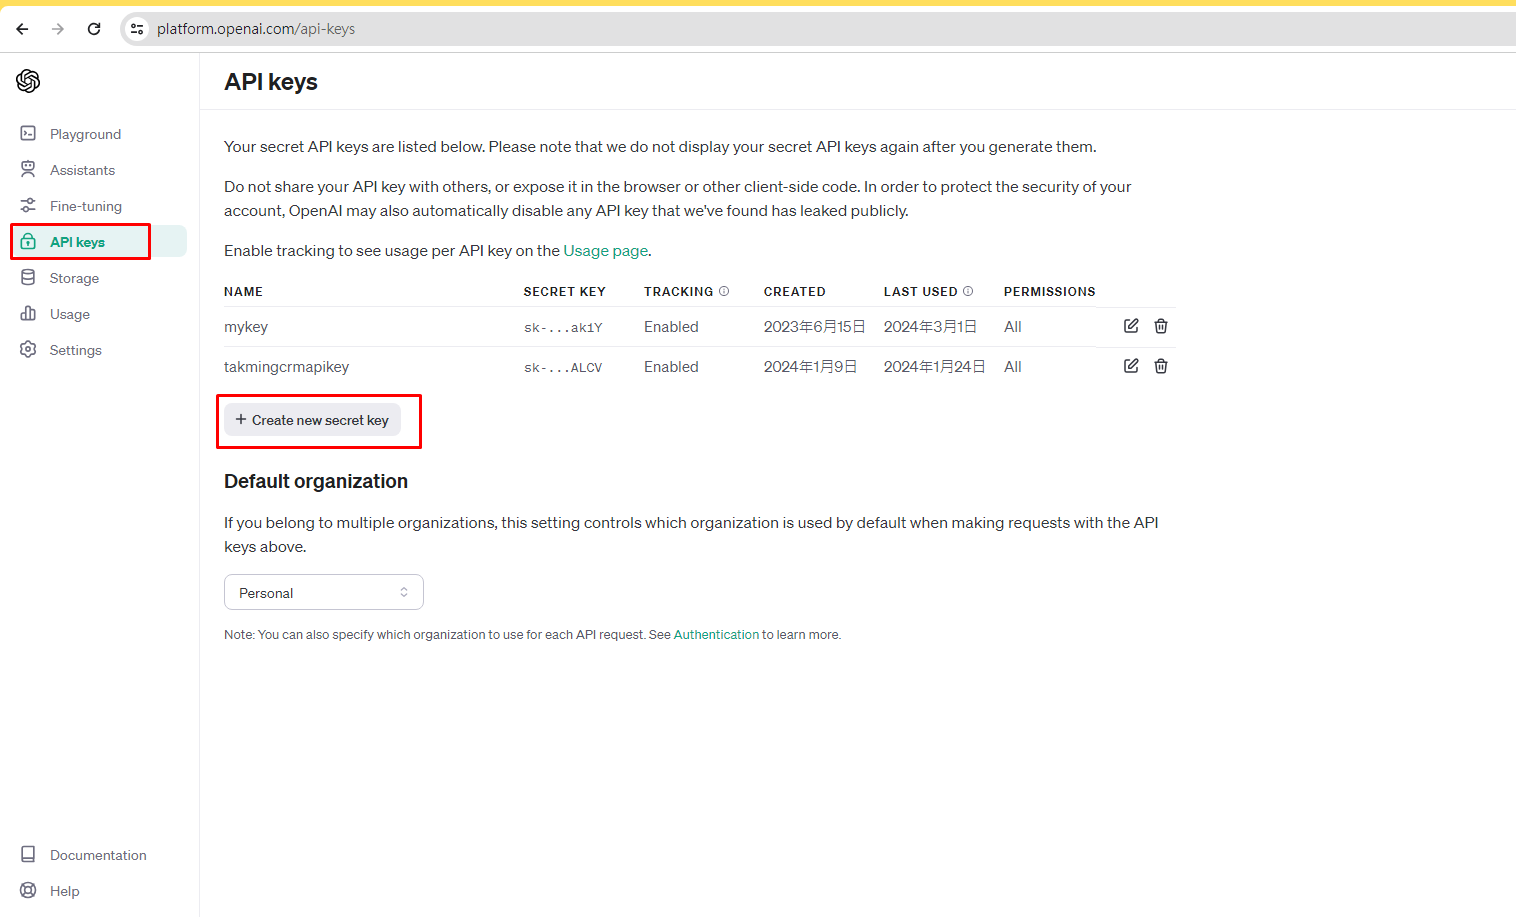

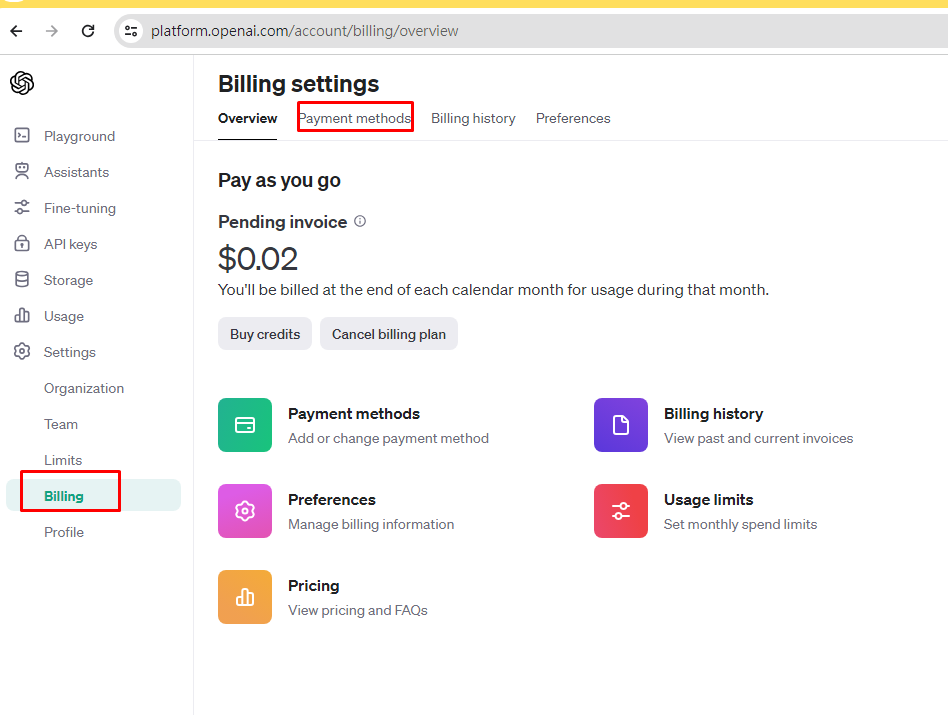

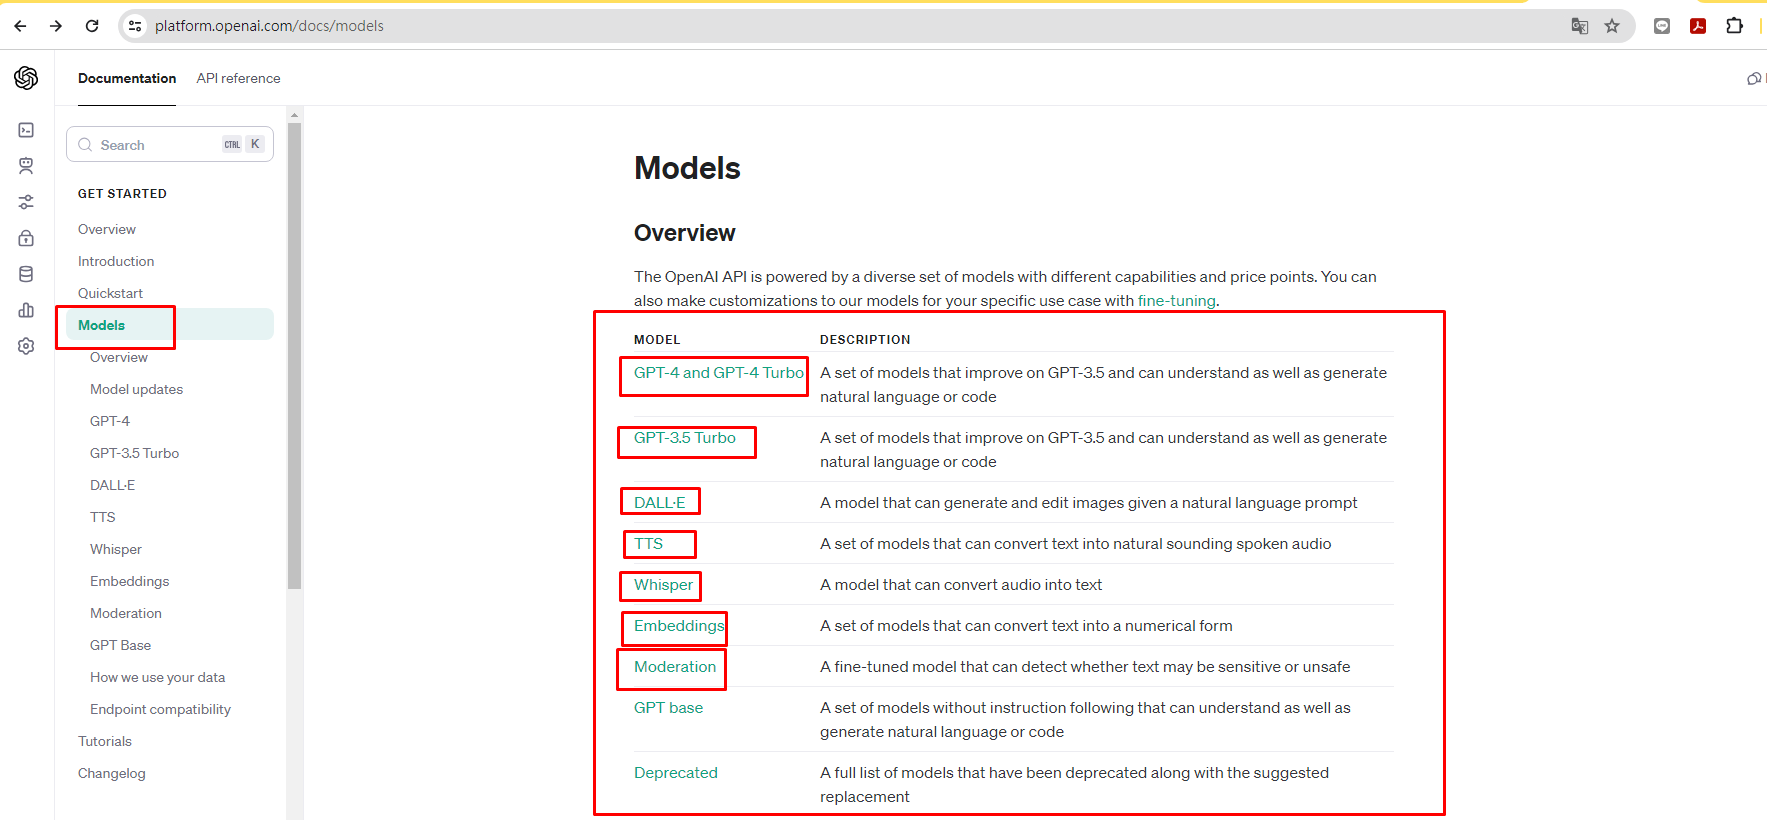

In [6]:
!pip install --upgrade openai

  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/a9/cc/f2bbce0ad52e09cd1aecb724af06385021b42a7317cd5938ba9c8581509d/openai-1.13.3-py3-none-any.whl.metadata
  Obtaining dependency information for distro<2,>=1.7.0 from https://files.pythonhosted.org/packages/12/b3/231ffd4ab1fc9d679809f356cebee130ac7daa00d6d6f3206dd4fd137e9e/distro-1.9.0-py3-none-any.whl.metadata
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/227.4 kB ? eta -:--:--
   ------- -------------------------------- 41.0/227.4 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/227.4 kB 3.2 MB/s eta 0:00:01
   ---------- ----------------------------- 61.4/227.4 kB 3.2 MB/s eta 0:00:01
   ------------ --

## 安裝OpenCC
### https://github.com/BYVoid/OpenCC
### Open Chinese Convert (OpenCC, 開放中文轉換),中文簡繁轉換開源項目

In [8]:
!pip install opencc

  Obtaining dependency information for opencc from https://files.pythonhosted.org/packages/58/e0/9adbd3983da5bf627a097dbfb81acfa02d68e6e97b8be367968b88dde6f1/OpenCC-1.1.7-cp39-cp39-win_amd64.whl.metadata
  Using cached OpenCC-1.1.7-cp39-cp39-win_amd64.whl.metadata (12 kB)
Using cached OpenCC-1.1.7-cp39-cp39-win_amd64.whl (716 kB)


## 安裝 dotenv 套件:取得環境變數中的值

In [ ]:
!pip install python-dotenv

In [1]:
#檢查目前執行程式的路徑,當作後續讀取檔案參考
import os
os.getcwd()

'D:\\python_ai'

## Importing library and thir function

In [1]:
#Importing library and thir function
import pandas as pd
from dotenv import load_dotenv
import os
import openai
#將呼叫chatgpt api 相關model的程式另寫在aimodels.py
from aimodels import OpenAIModel

In [13]:
#OPENAI_API key 不要直接填寫在程式碼內,openai 可能因資安問題不執行chatgpt api呼叫
#請將相關參數放在檔案中,如使用環境設定檔: .env
# .env file 內容
#OPENAI_API =" put your api key value"
#OPENAI_MODEL_ENGINE = 'gpt-3.5-turbo'
#SYSTEM_MESSAGE = 'You are a helpful assistant.'
#
#load_dotenv 讀入環境設定檔
load_dotenv('env_example.txt')
#設定openai 的 api_key 
openai.api_key = os.getenv('OPENAI_API')
#
my_secret = os.getenv('OPENAI_API')
model = OpenAIModel(api_key=my_secret)
#
filetypes=""
filename =""


## Read .csv  log file

In [5]:
df=pd.read_csv('winsec.csv')
df.head()

,等級,日期和時間,來源,事件識別碼,工作類別
資訊,2024/9/7 下午 04:22:47,Microsoft-Windows-Security-Auditing,4625,Logon,帳戶無法登入。\r\n\r\n主旨:\r\n\t安全性識別碼:\t\tNULL SID\r\...
資訊,2024/9/7 下午 04:22:47,Microsoft-Windows-Security-Auditing,4625,Logon,帳戶無法登入。\r\n\r\n主旨:\r\n\t安全性識別碼:\t\tNULL SID\r\...
資訊,2024/9/7 下午 04:22:47,Microsoft-Windows-Security-Auditing,4625,Logon,帳戶無法登入。\r\n\r\n主旨:\r\n\t安全性識別碼:\t\tNULL SID\r\...
資訊,2024/9/7 下午 04:22:47,Microsoft-Windows-Security-Auditing,4625,Logon,帳戶無法登入。\r\n\r\n主旨:\r\n\t安全性識別碼:\t\tNULL SID\r\...
資訊,2024/9/7 下午 04:22:47,Microsoft-Windows-Security-Auditing,4625,Logon,帳戶無法登入。\r\n\r\n主旨:\r\n\t安全性識別碼:\t\tNULL SID\r\...


## log file 筆數

In [33]:
df.shape[0]

35746

## 執行一筆 log data 分析

In [30]:
specific_row = df.iloc[0]
row_string =' '.join(specific_row.astype(str))
print(row_string)

2024/9/7 下午 04:22:47 Microsoft-Windows-Security-Auditing 4625 Logon 帳戶無法登入。

主旨:
	安全性識別碼:		NULL SID
	帳戶名稱:		-
	帳戶網域:		-
	登入識別碼:		0x0

登入類型:			3

登入失敗的帳戶:
	安全性識別碼:		NULL SID
	帳戶名稱:		ADMINISTRATOR
	帳戶網域:		

失敗資訊:
	失敗原因:		不明的使用者名稱或錯誤密碼。
	狀態:			0xC000006D
	子狀態:		0xC000006A

處理程序資訊:
	呼叫者處理程序識別碼:	0x0
	呼叫者處理程序名稱:	-

網路資訊:
	工作站名稱:	-
	來源網路位址:	140.131.139.33
	來源連接埠:		0

詳細驗證資訊:
	登入處理程序:		NtLmSsp 
	驗證封裝:	NTLM
	轉送的服務:	-
	封裝名稱 (僅限 NTLM):	-
	金鑰長度:		0

當登入要求失敗的時候，就會產生這個事件。這個事件在嘗試存取的電腦上產生。

主旨欄位顯示要求登入的本機系統上的帳戶。這通常是發生在服務 (例如伺服器服務) 或是本機處理程序 (例如 Winlogon.exe 或 Services.exe)。

登錄類型欄位顯示要求的登入類型。最常見的類型是 2 (互動式) 與 3 (網路)。

處理程序資訊欄位顯示系統上哪個帳戶與處理程序要求登入。

網路資訊欄位顯示遠端登入要求的來源。工作站名稱不是每次都有，並可能在某些狀況是空白。

驗證資訊欄位提供關於此次特定登入要求的詳細資訊。
	- 轉送的服務欄位顯示哪一個中介服務已經加入這個登入要求。
	- 封裝名稱欄位顯示在 NTLM 通訊協定中使用哪一個子協定。
	- 金鑰長度欄位顯示產生的工作階段金鑰長度。如果沒有要求工作階段金鑰則為 0。


In [31]:
row_strall=row_string

In [32]:
prompt=[
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
                          'role': 'user',
                          'content': "以下為系統日誌log內容,請分析日誌內容，關注特定安全事件、行為模式或異常活動,如登入事件分析：分析日誌中的異常登入嘗試，是否有大量登入失敗或可疑的IP位址登入？權限提升記錄：是否有權限提升的事件，例如用戶提升為管理員權限的記錄？日誌清除：請檢查是否有日誌被清除的記錄，可能表明有人試圖掩蓋活動。特定時段的事件或工作時間以外的活動：檢查是否有在非工作時間（如凌晨）發生的異常登入或活動。尋找惡意軟體的跡象：分析日誌中是否有任何與惡意軟體執行相關的記錄或新服務的安裝日誌。系統崩潰或異常行為：請查找系統是否有異常崩潰或重啟的事件，可能與惡意行為有關。根據事件ID過濾：請分析與特定事件ID相關的日誌，例如事件ID 4625（登入失敗）和4672（特權操作）。未授權的資料擷取：檢查日誌中是否有未授權的文件存取或資料提取的記錄。篩選特定事件:篩選出來自特定來源的安全性事件,統計每個事件的數量,列出最常見的事件類型,分析某個時段內的登入活動,找出異常模式或時間集中點等等,請以繁體中文條列式回覆: " + row_strall+ "\n A:"
              }]
#
role, response, error_message = model.chat_completions(prompt, 'gpt-4o')   
if error_message:
          print(error_message)    
else:
          print(response)
#資安摘要
f3 = open("slog3.txt", "w",encoding="utf-8")
f3.write(response)
f3.close()   

根據提供的系統日誌內容進行分析，以下條列出相關重要事件和觀察結果：

### 1. 登入事件分析
- 事件ID：4625（帳戶無法登入）
- 失敗原因：不明的使用者名稱或錯誤密碼
- 帳戶名稱：ADMINISTRATOR
- 來源IP位址：140.131.139.33

### 異常登入嘗試
1. **大量登入失敗**：
    - 日誌中提及帳戶ADMINISTRATOR多次嘗試登入但失敗。
    - 此為可疑活動，可能是暴力破解攻擊的徵兆。

2. **可疑的IP位址登入**：
    - 來源IP位址140.131.139.33似乎不是內部網路位址，可能為外部攻擊來源。

### 2. 權限提升記錄
- 淡部提及有權限提升的事件。
- 建議持續監控此類記錄，特別是帳戶提升為管理員權限的事件。

### 3. 日誌清除
- 該段日誌未提到有日誌被清除的事件。
- 應設定監控日誌清除行為，以防止潛在的掩蓋活動。

### 4. 特定時段的事件或工作時間以外的活動
- 日誌發生時間：2024/9/7 下午 4:22:47
    - 此為工作時間外的活動，應特別注意。
    - 登入失敗事件在非工作時段發生應引起警覺。

### 5. 惡意軟體的跡象
- 現有日誌未提及惡意軟體執行相關的記錄或新服務的安裝日誌。
- 建議定期掃描惡意軟體和檢查新服務安裝記錄。

### 6. 系統崩潰或異常行為
- 沒有提到系統崩潰或重啟的事件。
- 應持續監控異常系統行為，並進行相關的事件記錄。

### 7. 根據事件ID過濾
- **事件ID 4625**（登入失敗）：
    - 此次分析中主要關注帳戶ADMINISTRATOR的多次登入失敗事件。
- **事件ID 4672**（特權操作）：
    - 無此相關日誌顯示。建議定期查看此類日誌。

### 8. 未授權的資料擷取
- 日誌中未提到未授權的文件存取或資料提取的記錄。
- 應增加對資料擷取行為的監控，以防止未授權的活動。

### 9. 篩選特定事件
- **來自特定來源的安全性事件**：
    - 主體為不明身份者企圖使用ADMINISTRATOR帳戶從外部IP位址(140.131.139.33)進行登入。
- **統計每個事件的數量**：
    - 目前只有一例登入失敗事件，建議持續監控以探索更多模式

## ChatGpt 有執行Token字元數限制,要注意每次傳送log data 分析的內容量,1筆約4000token,可試試一次可傳送幾筆log data(This model's maximum context length is 128000 tokens.)

In [66]:
df2= df.iloc[:210]

In [67]:
rows_as_strings = []
for index, row in df2.iterrows():
    # 将每个单元格转换为字符串，并使用空格分隔
    row_string =' '.join(row.astype(str))
    rows_as_strings.append(row_string)

In [68]:
# 打印每一行的字符串形式
row_strall=""
for row_str in rows_as_strings:
    #print(row_str)
    row_strall=row_strall+row_str

In [69]:
prompt=[
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
                          'role': 'user',
                          'content': "以下為系統日誌log內容,請分析日誌內容，關注特定安全事件、行為模式或異常活動,如登入事件分析：分析日誌中的異常登入嘗試，是否有大量登入失敗或可疑的IP位址登入？權限提升記錄：是否有權限提升的事件，例如用戶提升為管理員權限的記錄？日誌清除：請檢查是否有日誌被清除的記錄，可能表明有人試圖掩蓋活動。特定時段的事件或工作時間以外的活動：檢查是否有在非工作時間（如凌晨）發生的異常登入或活動。尋找惡意軟體的跡象：分析日誌中是否有任何與惡意軟體執行相關的記錄或新服務的安裝日誌。系統崩潰或異常行為：請查找系統是否有異常崩潰或重啟的事件，可能與惡意行為有關。根據事件ID過濾：請分析與特定事件ID相關的日誌，例如事件ID 4625（登入失敗）和4672（特權操作）。未授權的資料擷取：檢查日誌中是否有未授權的文件存取或資料提取的記錄。篩選特定事件:篩選出來自特定來源的安全性事件,統計每個事件的數量,列出最常見的事件類型,分析某個時段內的登入活動,找出異常模式或時間集中點等等,請以繁體中文條列式回覆: " + row_strall+ "\n A:"
              }]
#
role, response, error_message = model.chat_completions(prompt, 'gpt-4o')   
if error_message:
          print(error_message)    
else:
          print(response)
#資安摘要
f3 = open("slog3.txt", "w",encoding="utf-8")
f3.write(response)
f3.close()   

以下是對系統日誌的分析，重點集中在特定的安全事件、行為模式和異常活動：

### 登入事件分析
1. **異常登入嘗試**：
   - 多次偵測到來自140.131.139.33 IP地址的嘗試登入失敗事件，登入嘗試包括多個不同行政帳戶（如ADMIN，ADMINISTRATOR，USER，PC）。
   - 所有的登入失敗事件都集中在同一時段發生，日期為2024/9/7下午4:22左右，這異常屬於多次失敗的暴力破解攻撃跡象。
   - 登入失敗日誌事件(4625)數量很多，登入類型主要是3（網路登入）。

### 權限提升記錄
2. 無明顯權限提升相關日誌記錄(事件ID 4672)顯示。

### 日誌清除
3. 未發現有日誌被清除的記錄。

### 特定時段的事件或工作時間以外的活動
4. **非工作時間**：
   - 當天的所有登入失敗事件都發生在非工作時間（下午4點22分左右）。

### 惡意軟體的跡象
5. 沒有直接顯示出安裝或啟動惡意軟體的相關記錄，但大量的登入失敗嘗試可能表明受到未授權訪問威脅。

### 系統崩潰或異常行為
6. 沒有檢測到系統崩潰或重啟相關的事件。

### 根據事件ID過濾
7. **事件ID 4625**：
   - 登入失敗的統計數據非常高，主要集中於使用ADMIN、USER、PC等常見帳戶名稱的嘗試。這些名稱通常為系統預設或管理帳戶，容易成為攻擊目標。
   
8. **事件ID 4672**：
   - 沒有找到任何權限提升相關的記錄。

### 未授權的資料擷取
9. 沒有明顯顯示未授權資料提取的記錄，但登入失敗記錄頻繁，可能預示未授權訪問企圖。

### 篩選特定事件
10. **統計登入失敗事件數目**：
    - 同一時段（2024/9/7 下午 04:21至04:22）內記錄了大量登入失敗事件，具體行頭有：ADMIN、ADMINISTRATOR、USER、PC等。
    - 大量的密集登入失敗在同一時段內發生，IP位址唯一（140.131.139.33），這可能是一種自動化攻擊行為，例如暴力破解。

### 總結：
- **危險預警**：
   - 來自139.33的暴力破解攻擊嘗試，針對多個帳戶進行登入。建議立即封鎖該IP地址，並檢查網路防火牆配置與帳戶鎖定政策。
   - 密切關注進一步的登入嘗試和系統

## Read .log  log file

In [23]:
logdata = []
f= open("u_ex240117.log", "r",encoding="utf-8")
fls = f.readlines()

for line in fls:
    logdata.append(line)
          

print(logdata[0])

#Software: Microsoft Internet Information Services 10.0



In [24]:
row_strall=""
for row_str in logdata:
    #print(row_str)
    row_strall=row_strall+row_str

In [25]:
prompt=[
        {
            "role": "system",
            "content": "You are a helpful assistant."
        },
        {
                          'role': 'user',
                          'content': "以下為系統日誌log內容,請分析日誌內容，關注特定安全事件、行為模式或異常活動,如登入事件分析：分析日誌中的異常登入嘗試，是否有大量登入失敗或可疑的IP位址登入？權限提升記錄：是否有權限提升的事件，例如用戶提升為管理員權限的記錄？日誌清除：請檢查是否有日誌被清除的記錄，可能表明有人試圖掩蓋活動。特定時段的事件或工作時間以外的活動：檢查是否有在非工作時間（如凌晨）發生的異常登入或活動。尋找惡意軟體的跡象：分析日誌中是否有任何與惡意軟體執行相關的記錄或新服務的安裝日誌。系統崩潰或異常行為：請查找系統是否有異常崩潰或重啟的事件，可能與惡意行為有關。根據事件ID過濾：請分析與特定事件ID相關的日誌，例如事件ID 4625（登入失敗）和4672（特權操作）。未授權的資料擷取：檢查日誌中是否有未授權的文件存取或資料提取的記錄。篩選特定事件:篩選出來自特定來源的安全性事件,統計每個事件的數量,列出最常見的事件類型,分析某個時段內的登入活動,找出異常模式或時間集中點等等,請以繁體中文條列式回覆: " + row_strall+ "\n A:"
              }]
#
role, response, error_message = model.chat_completions(prompt, 'gpt-4o')   
if error_message:
          print(error_message)    
else:
          print(response)
#資安摘要
f3 = open("slog3.txt", "w",encoding="utf-8")
f3.write(response)
f3.close()   

根據所提供的系統日誌記錄進行分析，以下是關於特定安全事件、行為模式和異常活動的分析：

### 登入事件分析
- **異常登入嘗試**:
  - 有大量來自 `157.245.56.179`、`65.49.1.22`、`87.236.176.214`、`60.16.193.22`、`182.54.7.36` 等等的IP地址的未授權訪問和SQL注入試探。
  - 嘗試訪問各種 `/login`、 `/signin`、 `/auth` 等目錄及類似的管理頁面，多次登入嘗試。

### 權限提升記錄
- 沒有直接的權限提升記錄，但有嘗試通過各種途徑訪問管理頁面的行為。
- `/system/console`、`/admin/`、`/manager/html` 等目錄的頻繁訪問嘗試可能表示試圖達到管理員權限。

### 日誌清除
- 沒有明顯的日誌清除活動記錄，但由於大量無效嘗試，也可能被黑客蓄意隱藏。

### 特定時段的事件或工作時間以外的活動
- 發生在凌晨0點至凌晨6點之間的大量訪問被記錄到：
  - 例如 `2024-01-17 01:00:15`、`2024-01-17 02:05:28`、`2024-01-17 04:00:20`等時段。
  - 這些登入和查詢很可能是可疑活動，特別是在凌晨時段。

### 尋找惡意軟體的跡象
- 多次與惡意注入相關的嘗試，例如：
  - 嘗試加載`config.xml`及其他敏感文件如`/etc/passwd`及各種adminphp文件夾。
  - XSS嘗試，例如注入 `<script>alert(document.domain)</script>`。
- 這類活動表明可能存在惡意軟件的探測和試圖利用漏洞行為。

### 系統崩潰或異常行為
- 記錄中無明顯的系統崩潰或重啟記錄，但頻繁的未授權訪問嘗試可能會對系統穩定性造成影響。

### 事件ID過濾
- 比較典型的事件ID有：
  - `4625` (登錄失敗)
  - `4672` (特權操作)。

### 未授權的資料擷取
- 多次未授權嘗試通過 URL 查詢來提取數據，例如：
  - 通過 `../../../etc/passwd`、`export_z3950.php` 等文件夾嘗試獲取敏感信息。
  
### 篩選特定事件
- 來自特定來源 `157.245.5